![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:


| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

**Tasks**

* Load the CSV file and store as netflix_df.
* Filter the data to remove TV shows and store as netflix_subset.
* Investigate the Netflix movie data, keeping only the columns "title", "country", "genre", "release_year", "duration", and saving this into a new DataFrame called netflix_movies.
* Filter netflix_movies to find the movies that are strictly shorter than 60 minutes, saving the resulting DataFrame as short_movies; inspect the result to find possible contributing factors.
* Using a for loop and if/elif statements, iterate through the rows of netflix_movies and assign colors of your choice to four genre groups ("Children", "Documentaries", "Stand-Up", and "Other" for everything else). Save the results in a colors list. Initialize a matplotlib figure object called fig and create a scatter plot for movie duration by release year using the colors list to color the points and using the labels "Release year" for the x-axis, "Duration (min)" for the y-axis, and the title "Movie Duration by Year of Release".
* After inspecting the plot, answer the question "Are we certain that movies are getting shorter?" by assigning either "yes" or "no" to the variable answer.
* Click the "Submit Project" button to check your solution.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

- Load the CSV file and store as **netflix_df**.


In [2]:
netflix_df = pd.read_csv("netflix_data.csv")

In [3]:
netflix_df.shape

(7787, 11)

In [4]:
netflix_df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1639,s1640,TV Show,Dawn of the Croods,NaN,"Stephanie Lemelin, A.J. LoCascio, Dan Milano, ...",United States,"July 7, 2017",2017,4,The world's first family is back for more laug...,Kids
1832,s1833,Movie,Double Dad,Cris D'Amato,"Maisa Silva, Eduardo Moscovis, Marcelo Médici,...",Brazil,"January 15, 2021",2020,105,"While her mom is away, a teen sneaks out of th...",Children
4457,s4458,Movie,Next Enti?,Kunal Kohli,"Navdeep, Larissa Bonesi, Sarathbabu, Tamannaah...",India,"January 9, 2019",2018,117,Clashing views on intimacy lead a couple to go...,Comedies
1628,s1629,Movie,Daughters of the Dust,Julie Dash,"Cora Lee Day, Alva Rogers, Barbarao, Trula Hoo...",United Kingdom,"June 10, 2017",1991,112,An African American Gullah family leaves their...,Classic Movies
65,s66,Movie,13 Sins,Daniel Stamm,"Mark Webber, Rutina Wesley, Devon Graye, Tom B...",United States,"January 13, 2019",2014,93,A man agrees to appear on a game show with a $...,Horror Movies


In [5]:
netflix_df['type'].value_counts()

type
Movie      5377
TV Show    2410
Name: count, dtype: int64

- Filter the data to remove TV shows and store as **netflix_subset**.


In [6]:
netflix_subset = netflix_df[netflix_df['type']!='TV Show']
netflix_subset.shape

(5377, 11)

In [7]:
netflix_subset.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


- Investigate the Netflix movie data, keeping only the columns "title", "country", "genre", "release_year", "duration", and saving this into a new DataFrame called **netflix_movies**.


In [8]:
netflix_movies = netflix_subset[["title","country", "genre", "release_year", "duration"]]
netflix_movies.shape

(5377, 5)

In [9]:
netflix_movies.columns

Index(['title', 'country', 'genre', 'release_year', 'duration'], dtype='object')

- Filter netflix_movies to find the movies that are strictly shorter than 60 minutes, saving the resulting DataFrame as **short_movies**; inspect the result to find possible contributing factors


In [10]:
netflix_movies[netflix_movies['duration'] < 60]

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
...,...,...,...,...,...
7679,WWII: Report from the Aleutians,United States,Documentaries,1943,45
7692,Ya no estoy aquí: Una conversación entre Guill...,NaN,Documentaries,2020,15
7718,Yoo Byung Jae: Discomfort Zone,South Korea,Stand-Up,2018,54
7771,Zion,United States,Documentaries,2018,12


In [11]:
short_movies = netflix_movies[netflix_movies['duration'] < 60]
short_movies.shape

(420, 5)

- Using a for loop and if/elif statements, iterate through the rows of netflix_movies and assign colors of your choice to four genre groups ("Children", "Documentaries", "Stand-Up", and "Other" for everything else). Save the results in a colors list. 
- Initialize a matplotlib figure object called fig and create a scatter plot for movie duration by release year using the colors list to color the points and using the labels "Release year" for the x-axis, "Duration (min)" for the y-axis, and the title "Movie Duration by Year of Release".

In [12]:
netflix_movies["genre"].value_counts()

genre
Dramas                  1384
Comedies                1074
Documentaries            751
Action                   721
Children                 502
Stand-Up                 321
Horror Movies            244
International Movies     114
Classic Movies            77
Uncategorized             56
Thrillers                 49
Independent Movies        20
Anime Features            19
Music                     17
Cult Movies               12
Sci-Fi                    11
Romantic Movies            3
Sports Movies              1
LGBTQ Movies               1
Name: count, dtype: int64

In [13]:
colors = []

for i in netflix_movies["genre"] :
    
    if i == "Children" :
        colors.append('blue')  
        
    elif i == "Documentaries":
        colors.append('green')
        
    elif i == "Stand-Up" :
        colors.append('red')
        
    else :
        colors.append('gray')
        
# netflix_movies['colors'] = colors 

In [14]:
netflix_movies.sample(2)      

,title,country,genre,release_year,duration
5127,Recall,Canada,Dramas,2018,73
6143,The Bleeding Edge,Australia,Documentaries,2018,101


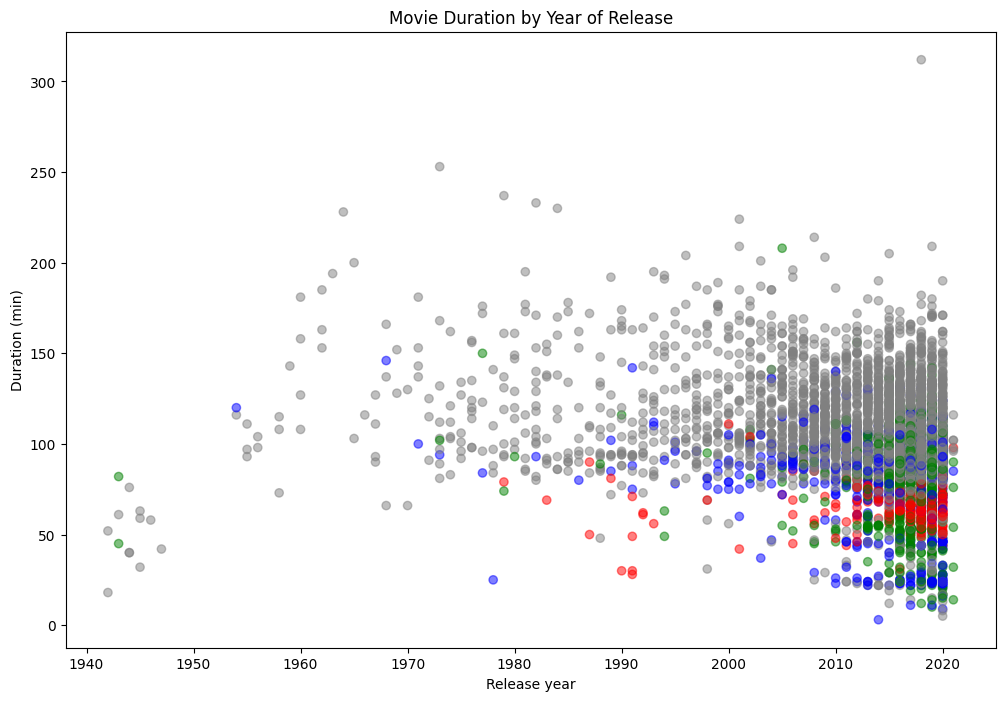

In [15]:
fig = plt.figure(figsize = [12, 8])

plt.scatter(netflix_movies['release_year'], netflix_movies['duration']
            , c=colors, alpha=0.5)


plt.title("Movie Duration by Year of Release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

plt.show()

In [16]:
# fig, ax = plt.subplots()


# scatter = ax.scatter(x = netflix_movies['release_year'],
#                      y = netflix_movies['duration'],
#                      c = netflix_movies['colors'],
#                      alpha = 0.8, s = 100)


# ax.set_xlabel('Release year')
# ax.set_ylabel('Duration (min)')
# ax.set_title('Movie Duration by Year of Release')

# plt.show()

- After inspecting the plot, answer the question "Are we certain that movies are getting shorter?" by assigning either "yes" or "no" to the variable answer

In [17]:
answer = "no"